<a href="https://colab.research.google.com/github/pashupati98/CatText/blob/master/BERT%2BXGBoost/BERT_(Features)_%2B_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install transformers

     |████████████████████████████████| 491kB 4.7MB/s 
     |████████████████████████████████| 1.0MB 40.8MB/s 
     |████████████████████████████████| 3.8MB 40.2MB/s 
     |████████████████████████████████| 870kB 50.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=256594cfebe0ddaaa5c7612180f01f41948d418a8e9324e9748e2397ae2ae364
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import numpy as np
import pandas as pd
import time
import math
import progressbar
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [0]:
url_rdf = '/content/drive/My Drive/IBM/dataset/raw_df.csv'
url_pdf = '/content/drive/My Drive/IBM/dataset/processed.csv'
url_udf = '/content/drive/My Drive/IBM/dataset/processed_user.csv'
url_olid = '/content/drive/My Drive/IBM/dataset/olid.csv'
url_hate = '/content/drive/My Drive/IBM/dataset/hate.csv'
rdf = pd.read_csv(url_rdf)
pdf = pd.read_csv(url_pdf)
udf = pd.read_csv(url_udf)
olid = pd.read_csv(url_olid)
hate = pd.read_csv(url_hate)


url = '/content/drive/My Drive/IBM/dataset/train.csv'
df = pd.read_csv(url)
#df = df[:1000]

In [30]:
olid.head()

,Unnamed: 0,tweet,label
0,0,@USER She should ask a few native Americans wh...,1
1,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,2,Amazon is investigating Chinese employees who ...,0
3,3,"@USER Someone should'veTaken"" this piece of sh...",1
4,4,@USER @USER Obama wanted liberals &amp; illega...,0


In [6]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
def find_max_len(tokenized):
  max_len = 0
  for i in tokenized.values:
      if len(i) > max_len:
          max_len = len(i)
  return max_len

In [0]:
def get_bert_features(df):
  tokenized = df['tweet'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
  max_len = find_max_len(tokenized)
  print("Max Len = ",max_len)
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
  attention_mask = np.where(padded != 0, 1, 0)

  input_ids = torch.tensor(padded)  
  attention_mask = torch.tensor(attention_mask)

  with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

  features = last_hidden_states[0][:,0,:].numpy()
  labels = df['label']

  return features, labels

In [0]:
def extract_features(df, batch_size=1000):
  features = []
  labels = []

  no_of_batches = math.ceil(len(df)/batch_size)
  print("\nInitializing...")
  print("Total no of batches : ",str(no_of_batches))
  batch_no = 1
  
  with progressbar.ProgressBar(max_value=len(df)) as bar:
    for i in range (0,len(df),batch_size):
      time.sleep(0.2)
      bar.update(i)
      print()
      print("\nGenerating features for batch",str(batch_no),"of",str(no_of_batches))
      dfn = df[i:i+batch_size]
      tfeatures, tlabels = get_bert_features(dfn)
      tfeatures = list(tfeatures)
      features.append(tfeatures)
      labels.append(tlabels)
      batch_no = batch_no + 1

  print("Done")
  features = np.concatenate(features)
  labels = np.concatenate(labels)

  return features, labels

In [0]:
#features, labels = extract_features(df,batch_size=1000)

In [0]:
# ft_df = pd.DataFrame(features)
# ft_df['label'] = labels

# train = ft_df
# train.shape

In [0]:
#train.to_csv("bert_features.csv")

#### Commented code

In [0]:
# tokenized = df['tweet'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

# max_len = 0
# for i in tokenized.values:
#     if len(i) > max_len:
#         max_len = len(i)

# padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

# attention_mask = np.where(padded != 0, 1, 0)
# attention_mask.shape

# input_ids = torch.tensor(padded)  
# attention_mask = torch.tensor(attention_mask)

# with torch.no_grad():
#     last_hidden_states = model(input_ids, attention_mask=attention_mask)

# features = last_hidden_states[0][:,0,:].numpy()

# labels = df['subtask_a']

# features = []
# labels = []

# for i in range (0,len(df),1000):
#   dfn = df[i:i+1000]
#   tfeatures, tlabels = get_bert_features(dfn)
#   tfeatures = list(tfeatures)
#   features.append(tfeatures)
#   labels.append(tlabels)
#   print(i)

# fearures = np.array(features)
# labels = np.array(features)

# train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scrores: ', grid_search.best_score_)

# lr_clf = LogisticRegression()
# lr_clf.fit(train_features, train_labels)

# lr_clf.score(test_features, test_labels)

### Model (XGBoost)

In [0]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import scipy as sp
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mp
from sklearn.metrics import confusion_matrix
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import matplotlib.pyplot as plt
%matplotlib inline

target = 'label'
IDcol = 'id'

In [0]:
def modelfit(alg, dtrain, val, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    val_predictors = [x for x in val.columns if x not in [IDcol,target]]
    eval_s = [(dtrain[predictors], dtrain[target]),(val[predictors], val[target])]
    alg.fit(dtrain[predictors], dtrain[target],early_stopping_rounds=10,eval_metric=["error", "logloss"],eval_set=eval_s,verbose=True)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    val_predictions = alg.predict(val[val_predictors])
        
    #Print model report:
    print ("\nModel Report")
    print ("Train Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("Validation Accuracy : %.4g" % metrics.accuracy_score(val[target].values, val_predictions))
    
    
    # retrieve performance metrics
    results = alg.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    #plt.savefig("log.png")
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()
    #plt.savefig('error.png')
    
    
    #print(alg.feature_importances_)
#     f = plot_importance(alg)
#     plt.show()
#     f.figure.savefig("feat_imp.pdf")

    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [0]:
# Train and validation set 


# train, val = train_test_split(train,test_size=0.2, random_state=42)
# print(train.shape)
# print(val.shape)

In [0]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
def experiment(df,batch_size=1000):
  features, labels = extract_features(df,batch_size)
  ft_df = pd.DataFrame(features)
  ft_df['label'] = labels
  train = ft_df
  print("Final df Shape : ",train.shape)

  train, val = train_test_split(train,test_size=0.2, random_state=42)
  print("Train Shape : ",train.shape)
  print("Val Shape : ",val.shape)

  predictors = [x for x in train.columns if x not in [target, IDcol]]
  modelfit(xgb1, train, val, predictors)

  val_predictors = [x for x in val.columns if x not in [IDcol,target]]
  val_predictions = xgb1.predict(val[predictors])
  cm = confusion_matrix(val[target], val_predictions)
  # dfcm = pd.DataFrame(cm)
  # plt.figure(figsize = (5,3))
  # sns.heatmap(dfcm, annot=True,annot_kws={"size": 12})
  # plt.show()

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 

  tn, fp, fn, tp = cm.ravel()
  #print(tn, fp, fn, tp)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2 * (precision * recall) / (precision + recall)
  accuracy = ((tp+tn)/(tp+tn+fp+fn))*100
  print("Precision :",precision)
  print("Recall :",recall)
  print("F1 Score :",f1)
  print("Validation Accuracy :",accuracy)

Experiment with OLID

In [0]:
solid = shuffle(olid)


Initializing...
Total no of batches :  14


N/A% (0 of 13240) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--



Generating features for batch 1 of 14
Max Len =  167


  7% (1000 of 13240) |#                  | Elapsed Time: 0:04:16 ETA:   0:52:18



Generating features for batch 2 of 14
Max Len =  171


 15% (2000 of 13240) |##                 | Elapsed Time: 0:08:40 ETA:   0:49:26



Generating features for batch 3 of 14
Max Len =  144


 22% (3000 of 13240) |####               | Elapsed Time: 0:12:17 ETA:   0:37:05



Generating features for batch 4 of 14
Max Len =  171


 30% (4000 of 13240) |#####              | Elapsed Time: 0:16:43 ETA:   0:40:58



Generating features for batch 5 of 14
Max Len =  148


 37% (5000 of 13240) |#######            | Elapsed Time: 0:20:34 ETA:   0:31:42



Generating features for batch 6 of 14
Max Len =  154


 45% (6000 of 13240) |########           | Elapsed Time: 0:24:35 ETA:   0:29:03



Generating features for batch 7 of 14
Max Len =  146


 52% (7000 of 13240) |##########         | Elapsed Time: 0:28:22 ETA:   0:23:36



Generating features for batch 8 of 14
Max Len =  169


 60% (8000 of 13240) |###########        | Elapsed Time: 0:32:49 ETA:   0:23:18



Generating features for batch 9 of 14
Max Len =  159


 67% (9000 of 13240) |############       | Elapsed Time: 0:36:58 ETA:   0:17:34



Generating features for batch 10 of 14
Max Len =  158


 75% (10000 of 13240) |#############     | Elapsed Time: 0:41:04 ETA:   0:13:16



Generating features for batch 11 of 14
Max Len =  163


 83% (11000 of 13240) |##############    | Elapsed Time: 0:45:19 ETA:   0:09:31



Generating features for batch 12 of 14
Max Len =  109


 90% (12000 of 13240) |################  | Elapsed Time: 0:48:05 ETA:   0:03:26



Generating features for batch 13 of 14
Max Len =  166


 98% (13000 of 13240) |################# | Elapsed Time: 0:52:25 ETA:   0:01:02



Generating features for batch 14 of 14
Max Len =  133


100% (13240 of 13240) |##################| Elapsed Time: 0:53:15 Time:  0:53:15


Done
Final df Shape :  (13240, 769)
Train Shape :  (10592, 769)
Val Shape :  (2648, 769)
[0]	validation_0-error:0.297866	validation_0-logloss:0.671212	validation_1-error:0.321752	validation_1-logloss:0.673993
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.277946	validation_0-logloss:0.651924	validation_1-error:0.300227	validation_1-logloss:0.657597
[2]	validation_0-error:0.264823	validation_0-logloss:0.634244	validation_1-error:0.297583	validation_1-logloss:0.643181
[3]	validation_0-error:0.257931	validation_0-logloss:0.619078	validation_1-error:0.288142	validation_1-logloss:0.631001
[4]	validation_0-error:0.254248	validation_0-logloss:0.605767	validation_1-error:0.291163	validation_1-logloss:0.62055
[5]	validation_0-error:0.252643	validation_0-logloss:0.593551	validation_1-error:0.29003	validation_1-logloss:0.611245
[6]	validation_0-error:0.250

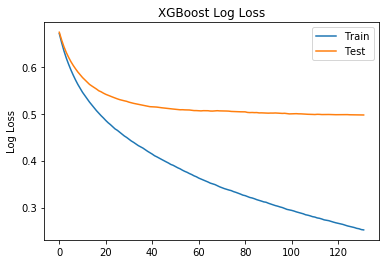

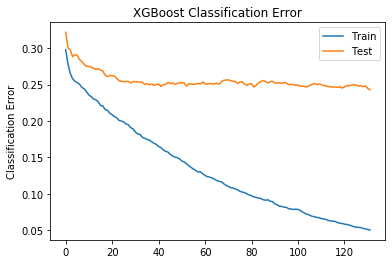

Precision : 0.6661016949152543
Recall : 0.46072684642438455
F1 Score : 0.5446985446985447
Validation Accuracy : 75.18882175226587


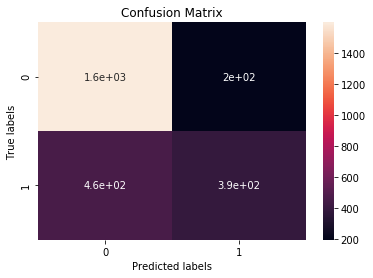

In [32]:
experiment(solid)

 Experiment with RDF

In [0]:
srdf = shuffle(rdf)